# Clustering

Dans cet essai qui constitue le baseline des clusters pour le jeu de données, 

- Toutes les variables disponibles sont utilisées
- L'algorithme du k-means est utilisé (même si les variables ne sont pas tout à fait adéquates pour ce genre de méthode étant donné qu'elles sont binaires et ordinales plutôt que continues)

À la fin de cette étape, nous aurons : 

- Les valeurs des moyennes et ecart-type pour le scaling des variables (`03_pilot1_scale_origins.rds` et `03_pilot1_scale_ecarts_types.rds`)
- Le modèle de k-means (`03_pilot1_kmeans.rds`)
- Le fichier de données original augmenté des variables de cluster (`03_pilot1_2022.rds`)
- Un fichier csv (pour ouverture dans excel par exemple) qui contient la moyenne par cluster par variable afin de déterminer "à la main" quels sont les éléments distinctifs de chaque cluster (`03_pilot1_clusters_desc.csv`)

In [8]:
library(dplyr)
library(factoextra)

df_pilot1_2022 <- readRDS(file = "../../_PrivateFolder_datagotchi_federal_2025/data/clustering/qc2022/02_pilot1_2022.rds")





In [9]:
# Sélection des variables pour le clustering
source("03-0_variables.R")
df_pilot1_2022_clust <- df_pilot1_2022 %>% select(all_of(variables_clust)) %>% select(-id)

In [10]:
# Scaling des variables
df_scaled <- scale(df_pilot1_2022_clust)

# Récupérer les moyennes et écarts-types
origines <- attr(df_scaled, "scaled:center")  # Moyennes utilisées pour centrer
ecarts_types <- attr(df_scaled, "scaled:scale")  # Écarts-types utilisés pour réduire

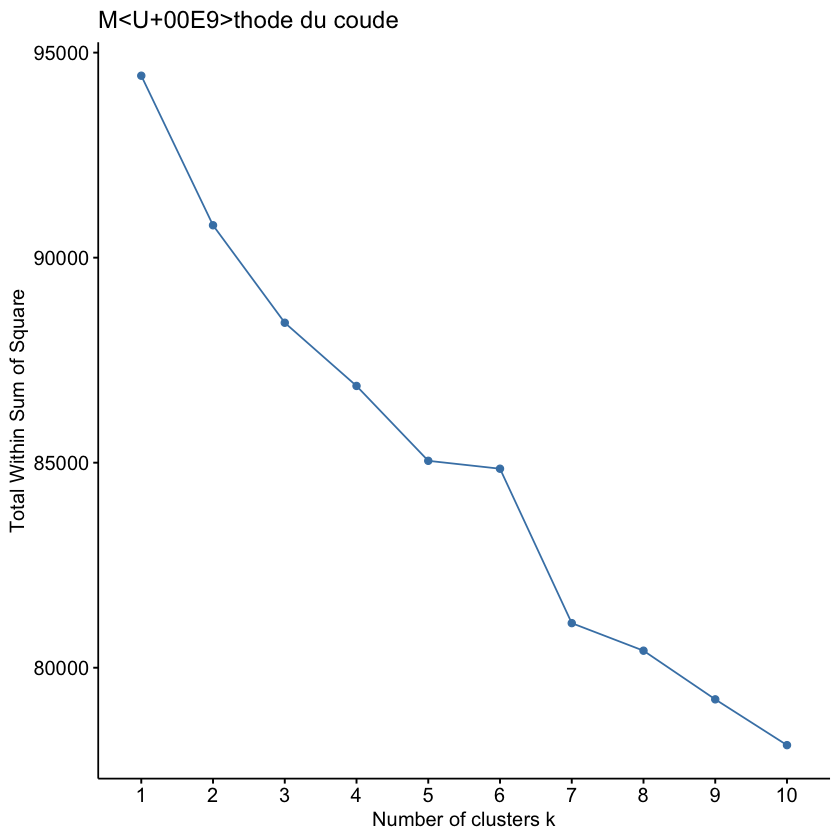

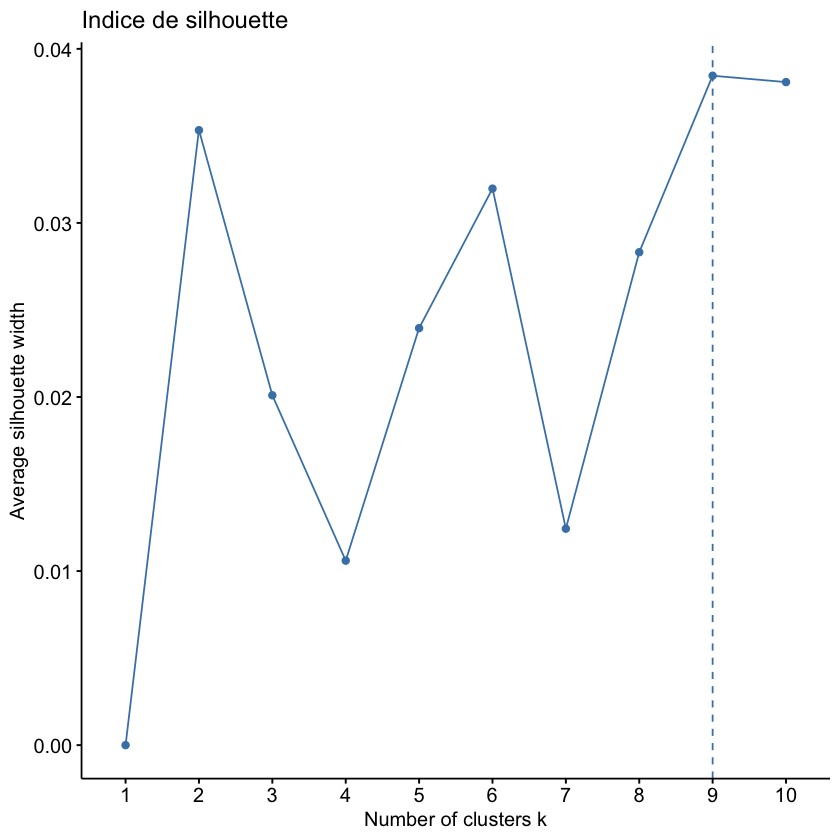

In [11]:
# Détermination du nombre optimal de clusters
# Méthode de l’élbow (coude) et l’indice de silhouette.

# Méthode du coude
fviz_nbclust(df_scaled, kmeans, method = "wss") +
  ggtitle("Méthode du coude")

# Indice de silhouette
fviz_nbclust(df_scaled, kmeans, method = "silhouette") +
  ggtitle("Indice de silhouette")

In [12]:
# Application de K-Means Clustering

# Choisissez un nombre de clusters approprié (par exemple, 3).
k <- 5

# K-Means Clustering
set.seed(123)  # Pour la reproductibilité
kmeans_result <- kmeans(df_scaled, centers = k, nstart = 25)

In [13]:
kmeans_result

K-means clustering with 5 clusters of sizes 428, 116, 547, 264, 145

Cluster means:
      act_Gym    act_Walk     act_Run    act_Yoga   act_Other   act_None
1  0.11832815 -0.01832056  0.23748138  0.09174020 -0.09854090 -0.1705202
2  0.07268546  0.02879289  0.22457852  0.04664994 -0.09832909 -0.1891017
3 -0.10017720 -0.07607969 -0.20109268 -0.11852290  0.02928221  0.2094215
4 -0.05051286  0.15690694 -0.07828161  0.02403599  0.15646286 -0.1403818
5  0.06245768  0.03236816  0.02048899  0.09524362 -0.02580610  0.1201768
  act_Fishing  act_Hunting act_VisitsMuseumsGaleries
1  0.52569899  0.570415596                0.08808265
2 -0.06420282 -0.004814416                0.25502620
3 -0.26746455 -0.299035736               -0.23555179
4 -0.17858573 -0.219464590                0.08973248
5 -0.16622001 -0.152194509                0.26120716
  act_MotorizedOutdoorActivities act_Volunteering app_swag_Classique
1                     0.79125973       0.13530603         0.09329081
2                    -

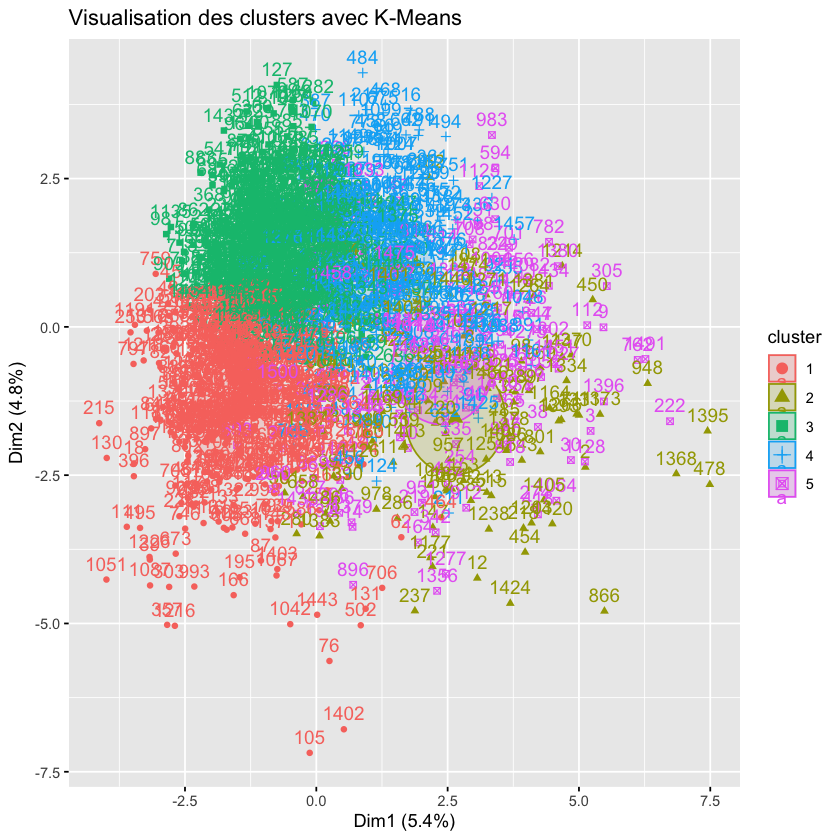

In [14]:
# Visualisation des clusters

# Visualisation des clusters dans l’espace des deux premières dimensions :

# Utilisation de factoextra pour représenter les clusters
fviz_cluster(kmeans_result, data = df_scaled, ellipse.type = "euclid") +
  ggtitle("Visualisation des clusters avec K-Means")

In [15]:
library(dplyr)
library(tidyr)

# Ajouter les clusters au dataframe original
df_pilot1_2022$cluster <- as.factor(kmeans_result$cluster)

# Préparer les données pour pouvoir donner des noms aux clusters
df_pilot1_2022 <- df_pilot1_2022 %>%
  mutate(cluster_name = as.character(cluster))

# Créer des variables dummy
# Liste des clusters
clusters_uniques <- unique(df_pilot1_2022$cluster)
# Création des variables
for (i in clusters_uniques) {
  df_pilot1_2022[[paste0("cluster_", i)]] <- ifelse(df_pilot1_2022$cluster == i, 1, 0)
}

In [16]:
# Sauvegarder les résultats du clustering
saveRDS(origines, file="../../_PrivateFolder_datagotchi_federal_2025/data/clustering/qc2022/03_pilot1_scale_origins.rds")
saveRDS(ecarts_types, file="../../_PrivateFolder_datagotchi_federal_2025/data/clustering/qc2022/03_pilot1_scale_ecarts_types.rds")
saveRDS(kmeans_result, file = "../../_PrivateFolder_datagotchi_federal_2025/data/clustering/qc2022/03_pilot1_kmeans.rds")
saveRDS(df_pilot1_2022, file = "../../_PrivateFolder_datagotchi_federal_2025/data/clustering/qc2022/03_pilot1_2022.rds")